- Collecting all the data for Jakarta in one DataFrame

In [1]:
import pandas as pd

data_jakarta = pd.read_csv('1980-2023 renewable energy data/ninja_pv_-7.2623_112.7361_1980.csv', header=3)
name = "1980-2023 renewable energy data/ninja_pv_-7.2623_112.7361_"

for i in range(1981, 2024):
    data_jakarta = pd.concat([data_jakarta, pd.read_csv(name + str(i) + '.csv', header=3)])

data_jakarta.drop(columns=['time'], inplace=True)
data_jakarta['local_time'] = pd.to_datetime(data_jakarta['local_time'])

- Summing up hourly data to get aggregated yearly data

In [2]:
data_jakarta['local_time'] = data_jakarta['local_time'].dt.year
data_jakarta = data_jakarta.groupby('local_time').sum()
#data_jakarta.reset_index(inplace=True)
data_jakarta = data_jakarta.iloc[:-1,:]

data_jakarta.tail()

,electricity
local_time,
2019,1949969.043
2020,1754165.795
2021,1646240.327
2022,1513700.956
2023,1846196.197


- Visualizing the data

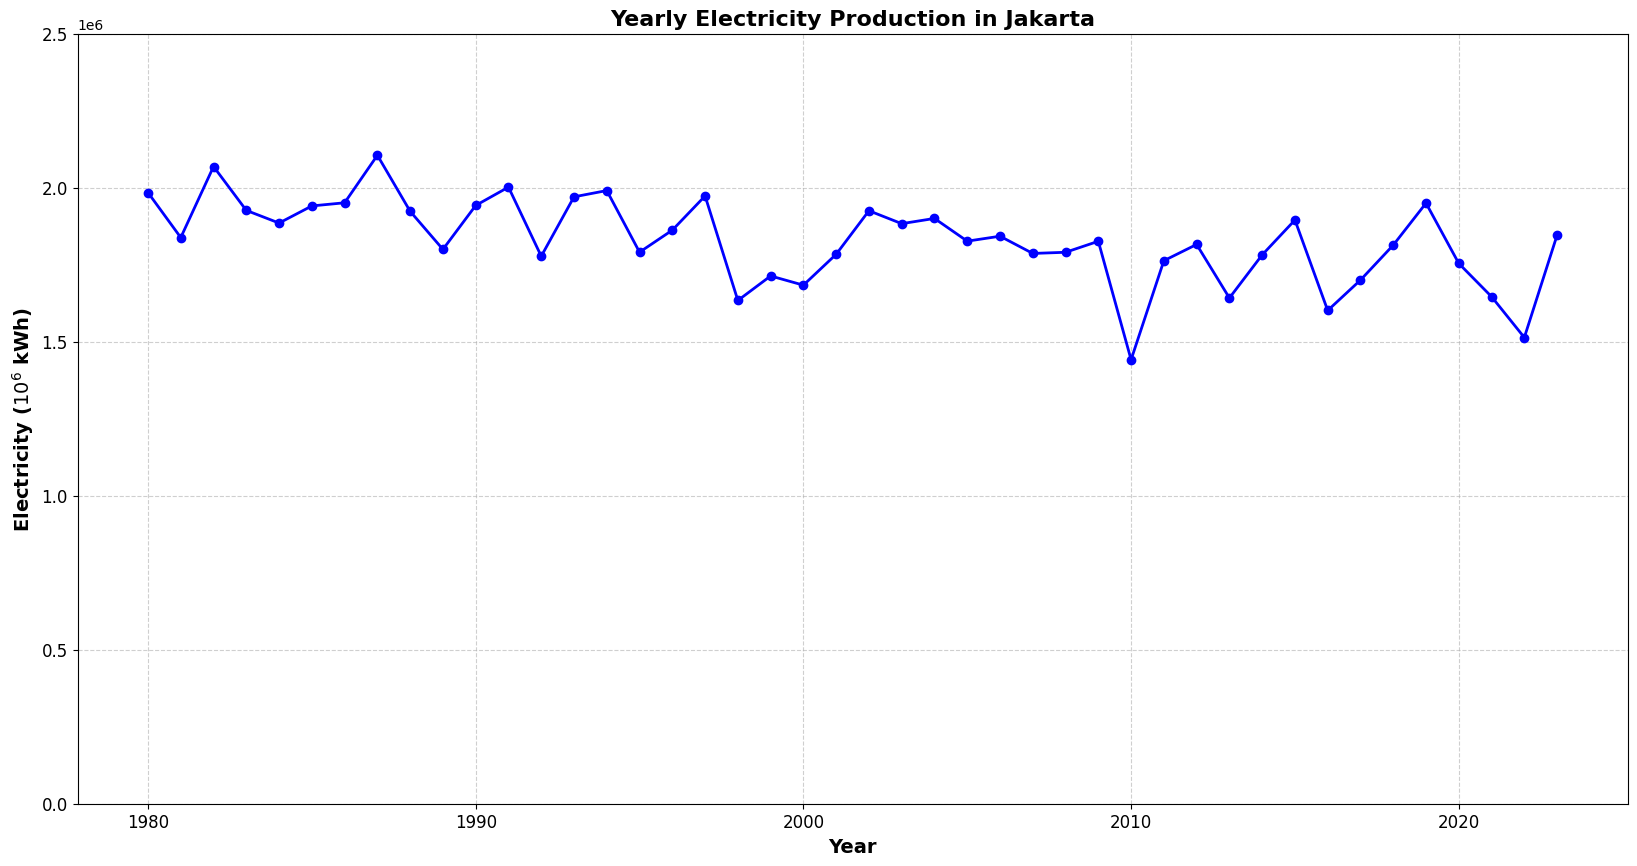

In [3]:
import matplotlib.pyplot as plt

# Create the plot with a larger figure size
plt.figure(figsize=(20,10))

# Plotting the data with customizations
plt.plot(data_jakarta['electricity'], label=name, color='blue', linestyle='-', linewidth=2, marker='o', markersize=6)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Customizing the labels and title
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Electricity ($10^6$ kWh)', fontsize=14, fontweight='bold')
plt.title('Yearly Electricity Production in Jakarta', fontsize=16, fontweight='bold')

# Adjusting the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding limit to the y-axis
plt.ylim(0, 2500000)

# Save the plot
plt.savefig('visualizations/yearly_plots/aggregated_yearly.png')

- Calculating standard deviation to mean ratio of the data

In [4]:
print('Sigma / mean ratio:', data_jakarta['electricity'].std() / data_jakarta['electricity'].mean())

Sigma / mean ratio: 0.07623793373109286


- Visualizing 4-Y average of the data

In [5]:
data_jakarta['electricity']

local_time
1980    1984215.040
1981    1838153.820
1982    2068803.876
1983    1926352.241
1984    1885275.517
1985    1940873.569
1986    1951143.692
1987    2105383.706
1988    1923381.114
1989    1799819.844
1990    1942424.567
1991    2001966.894
1992    1777557.862
1993    1970400.155
1994    1990792.359
1995    1790723.418
1996    1862215.666
1997    1973296.457
1998    1633907.377
1999    1713535.308
2000    1683637.982
2001    1783958.153
2002    1925298.682
2003    1883313.057
2004    1900290.624
2005    1826529.309
2006    1842572.170
2007    1786635.778
2008    1790393.904
2009    1826130.974
2010    1441530.109
2011    1763011.252
2012    1815850.831
2013    1641965.980
2014    1781967.197
2015    1895202.710
2016    1601410.129
2017    1700190.457
2018    1813670.267
2019    1949969.043
2020    1754165.795
2021    1646240.327
2022    1513700.956
2023    1846196.197
Name: electricity, dtype: float64

- Visualizing the data by taking 4-Y averages

In [6]:
data_4Y = {}

for i in range(1980, 2024, 4):
    data_4Y[f'{i}-{i+3}'] = data_jakarta.loc[i:i+3, 'electricity'].mean()
data_4Y = pd.Series(data_4Y)
data_4Y

1980-1983    1.954381e+06
1984-1987    1.970669e+06
1988-1991    1.916898e+06
1992-1995    1.882368e+06
1996-1999    1.795739e+06
2000-2003    1.819052e+06
2004-2007    1.839007e+06
2008-2011    1.705267e+06
2012-2015    1.783747e+06
2016-2019    1.766310e+06
2020-2023    1.690076e+06
dtype: float64

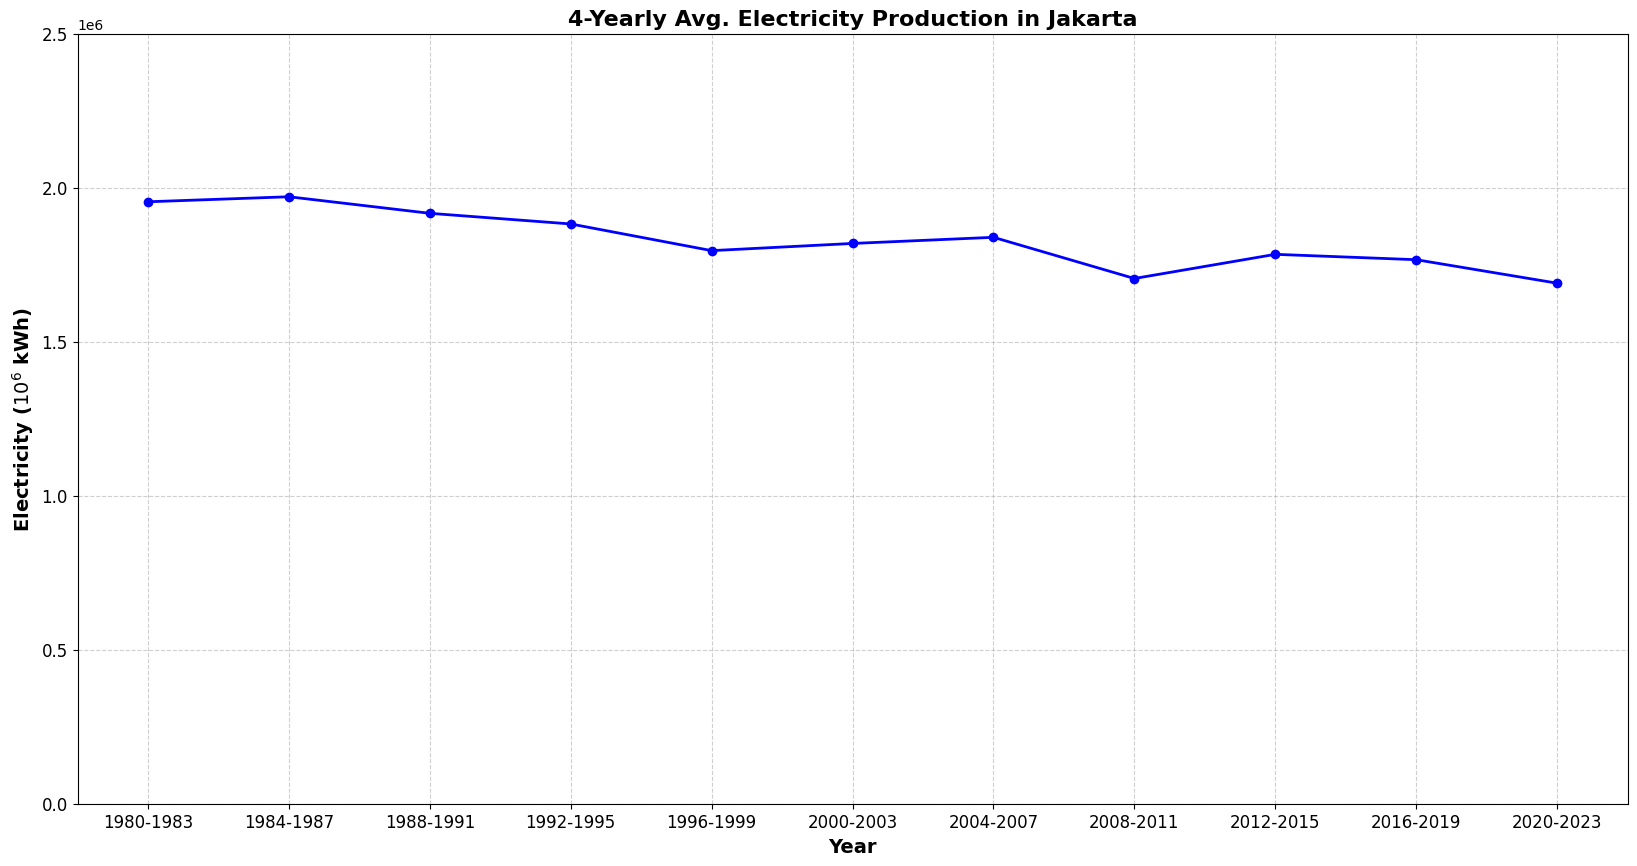

In [7]:
# Create the plot with a larger figure size
plt.figure(figsize=(20,10))

# Plotting the data with customizations
plt.plot(data_4Y, label=name, color='blue', linestyle='-', linewidth=2, marker='o', markersize=6)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Customizing the labels and title
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Electricity ($10^6$ kWh)', fontsize=14, fontweight='bold')
plt.title('4-Yearly Avg. Electricity Production in Jakarta', fontsize=16, fontweight='bold')

# Adjusting the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding limit to the y-axis
plt.ylim(0, 2500000)

# Save the plot
plt.savefig('visualizations/yearly_plots/4Y_avg_aggregated_yearly.png')

- Visualizing the data by taking 5-Y averages

In [8]:
data_5Y = {}

for i in range(1984, 2024, 5):
    data_5Y[f'{i}-{i+4}'] = data_jakarta.loc[i:i+4, 'electricity'].mean()
data_5Y = pd.Series(data_5Y)
data_5Y

1984-1988    1.961212e+06
1989-1993    1.898434e+06
1994-1998    1.850187e+06
1999-2003    1.797949e+06
2004-2008    1.829284e+06
2009-2013    1.697698e+06
2014-2018    1.758488e+06
2019-2023    1.742054e+06
dtype: float64

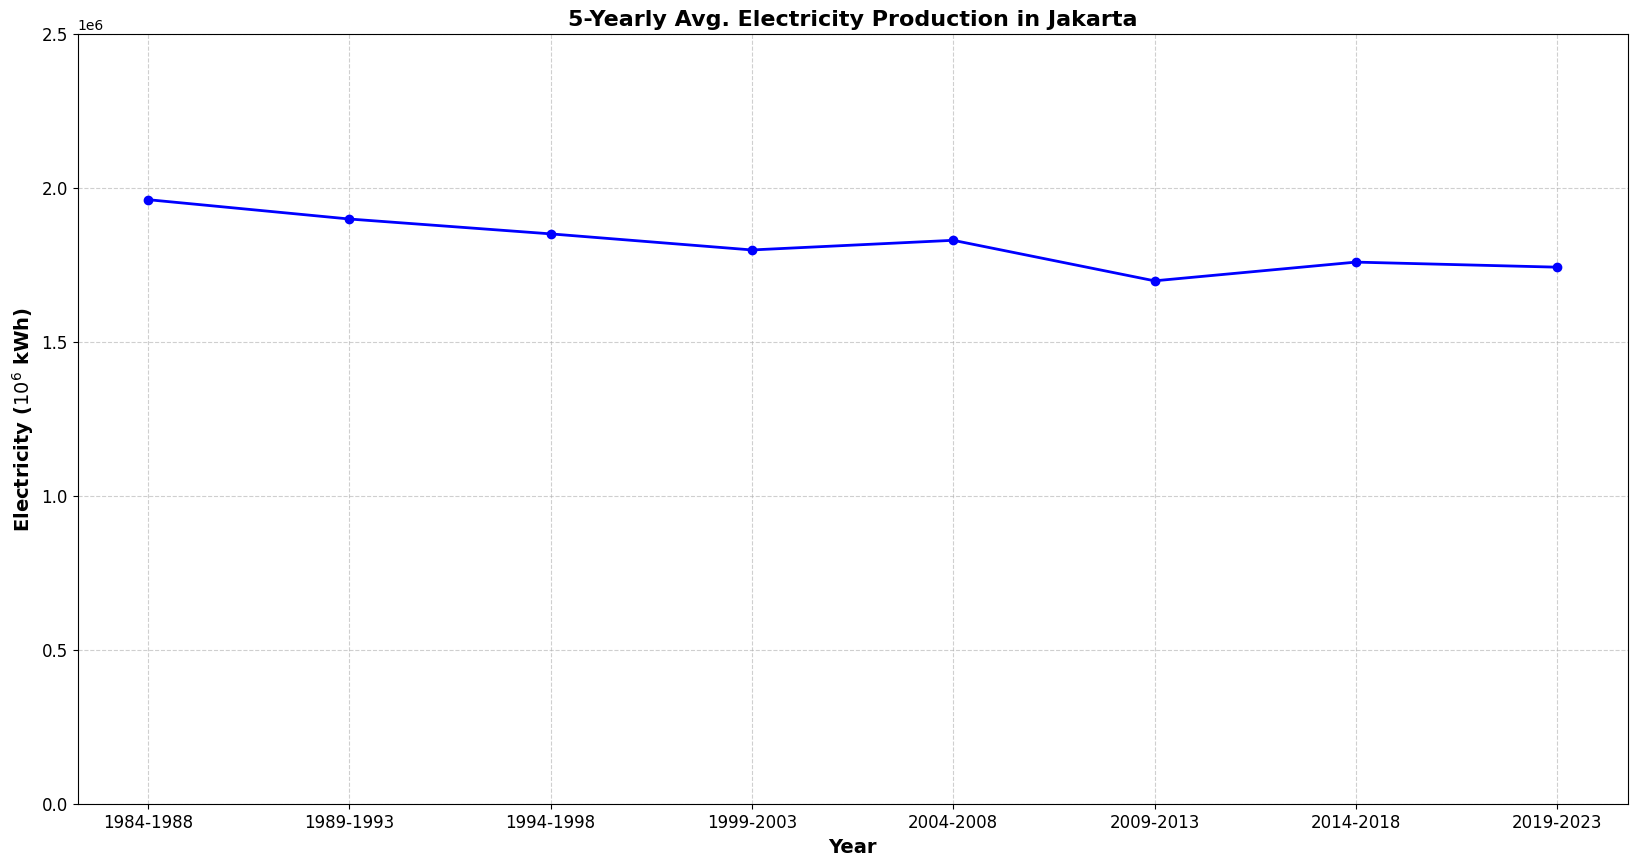

In [9]:
# Create the plot with a larger figure size
plt.figure(figsize=(20,10))

# Plotting the data with customizations
plt.plot(data_5Y, label=name, color='blue', linestyle='-', linewidth=2, marker='o', markersize=6)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Customizing the labels and title
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Electricity ($10^6$ kWh)', fontsize=14, fontweight='bold')
plt.title('5-Yearly Avg. Electricity Production in Jakarta', fontsize=16, fontweight='bold')

# Adjusting the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding limit to the y-axis
plt.ylim(0, 2500000)

# Save the plot
plt.savefig('visualizations/yearly_plots/5Y_avg_aggregated_yearly.png')